# 1. Problems
 - Predict the type of forest cover
 > **Multi-class SVM** 
 
 > **Ensemble model**
 
 > **DNN** 

# 2. Loading the data sets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kakao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.style.use('ggplot')

In [3]:
train_set = pd.read_csv('./input/forest_train.csv')
test_set = pd.read_csv('./input/forest_test.csv')

In [4]:
# display(train_set.head())
# display(train_set.describe())

In [5]:
# display(train_set.keys())
# display(len(train_set.keys()))

In [6]:
# Checking binary column
soil_cols = ['Soil_Type' + str(i) for i in range(1, 41)]
wilder_cols = ['Wilderness_Area' + str(i) for i in range(1, 5)]

# If sum : 15120 => data is OK!
display(train_set[soil_cols].sum(axis=1).sum(axis=0))
display(train_set[wilder_cols].sum(axis=1).sum(axis=0))

15120

15120

# 3. Feature engineering
## 3-1. Pearson Correlation

In [8]:
# categorical variable
cate_vars = soil_cols[:]
cate_vars.extend(wilder_cols)

# continuous variable
cont_vars = list(train_set.keys())
cont_vars.remove('Id')
cont_vars.remove('Cover_Type')
cont_vars = [var for var in cont_vars if var not in cate_vars]

# print(cate_vars)
# print(cont_vars)

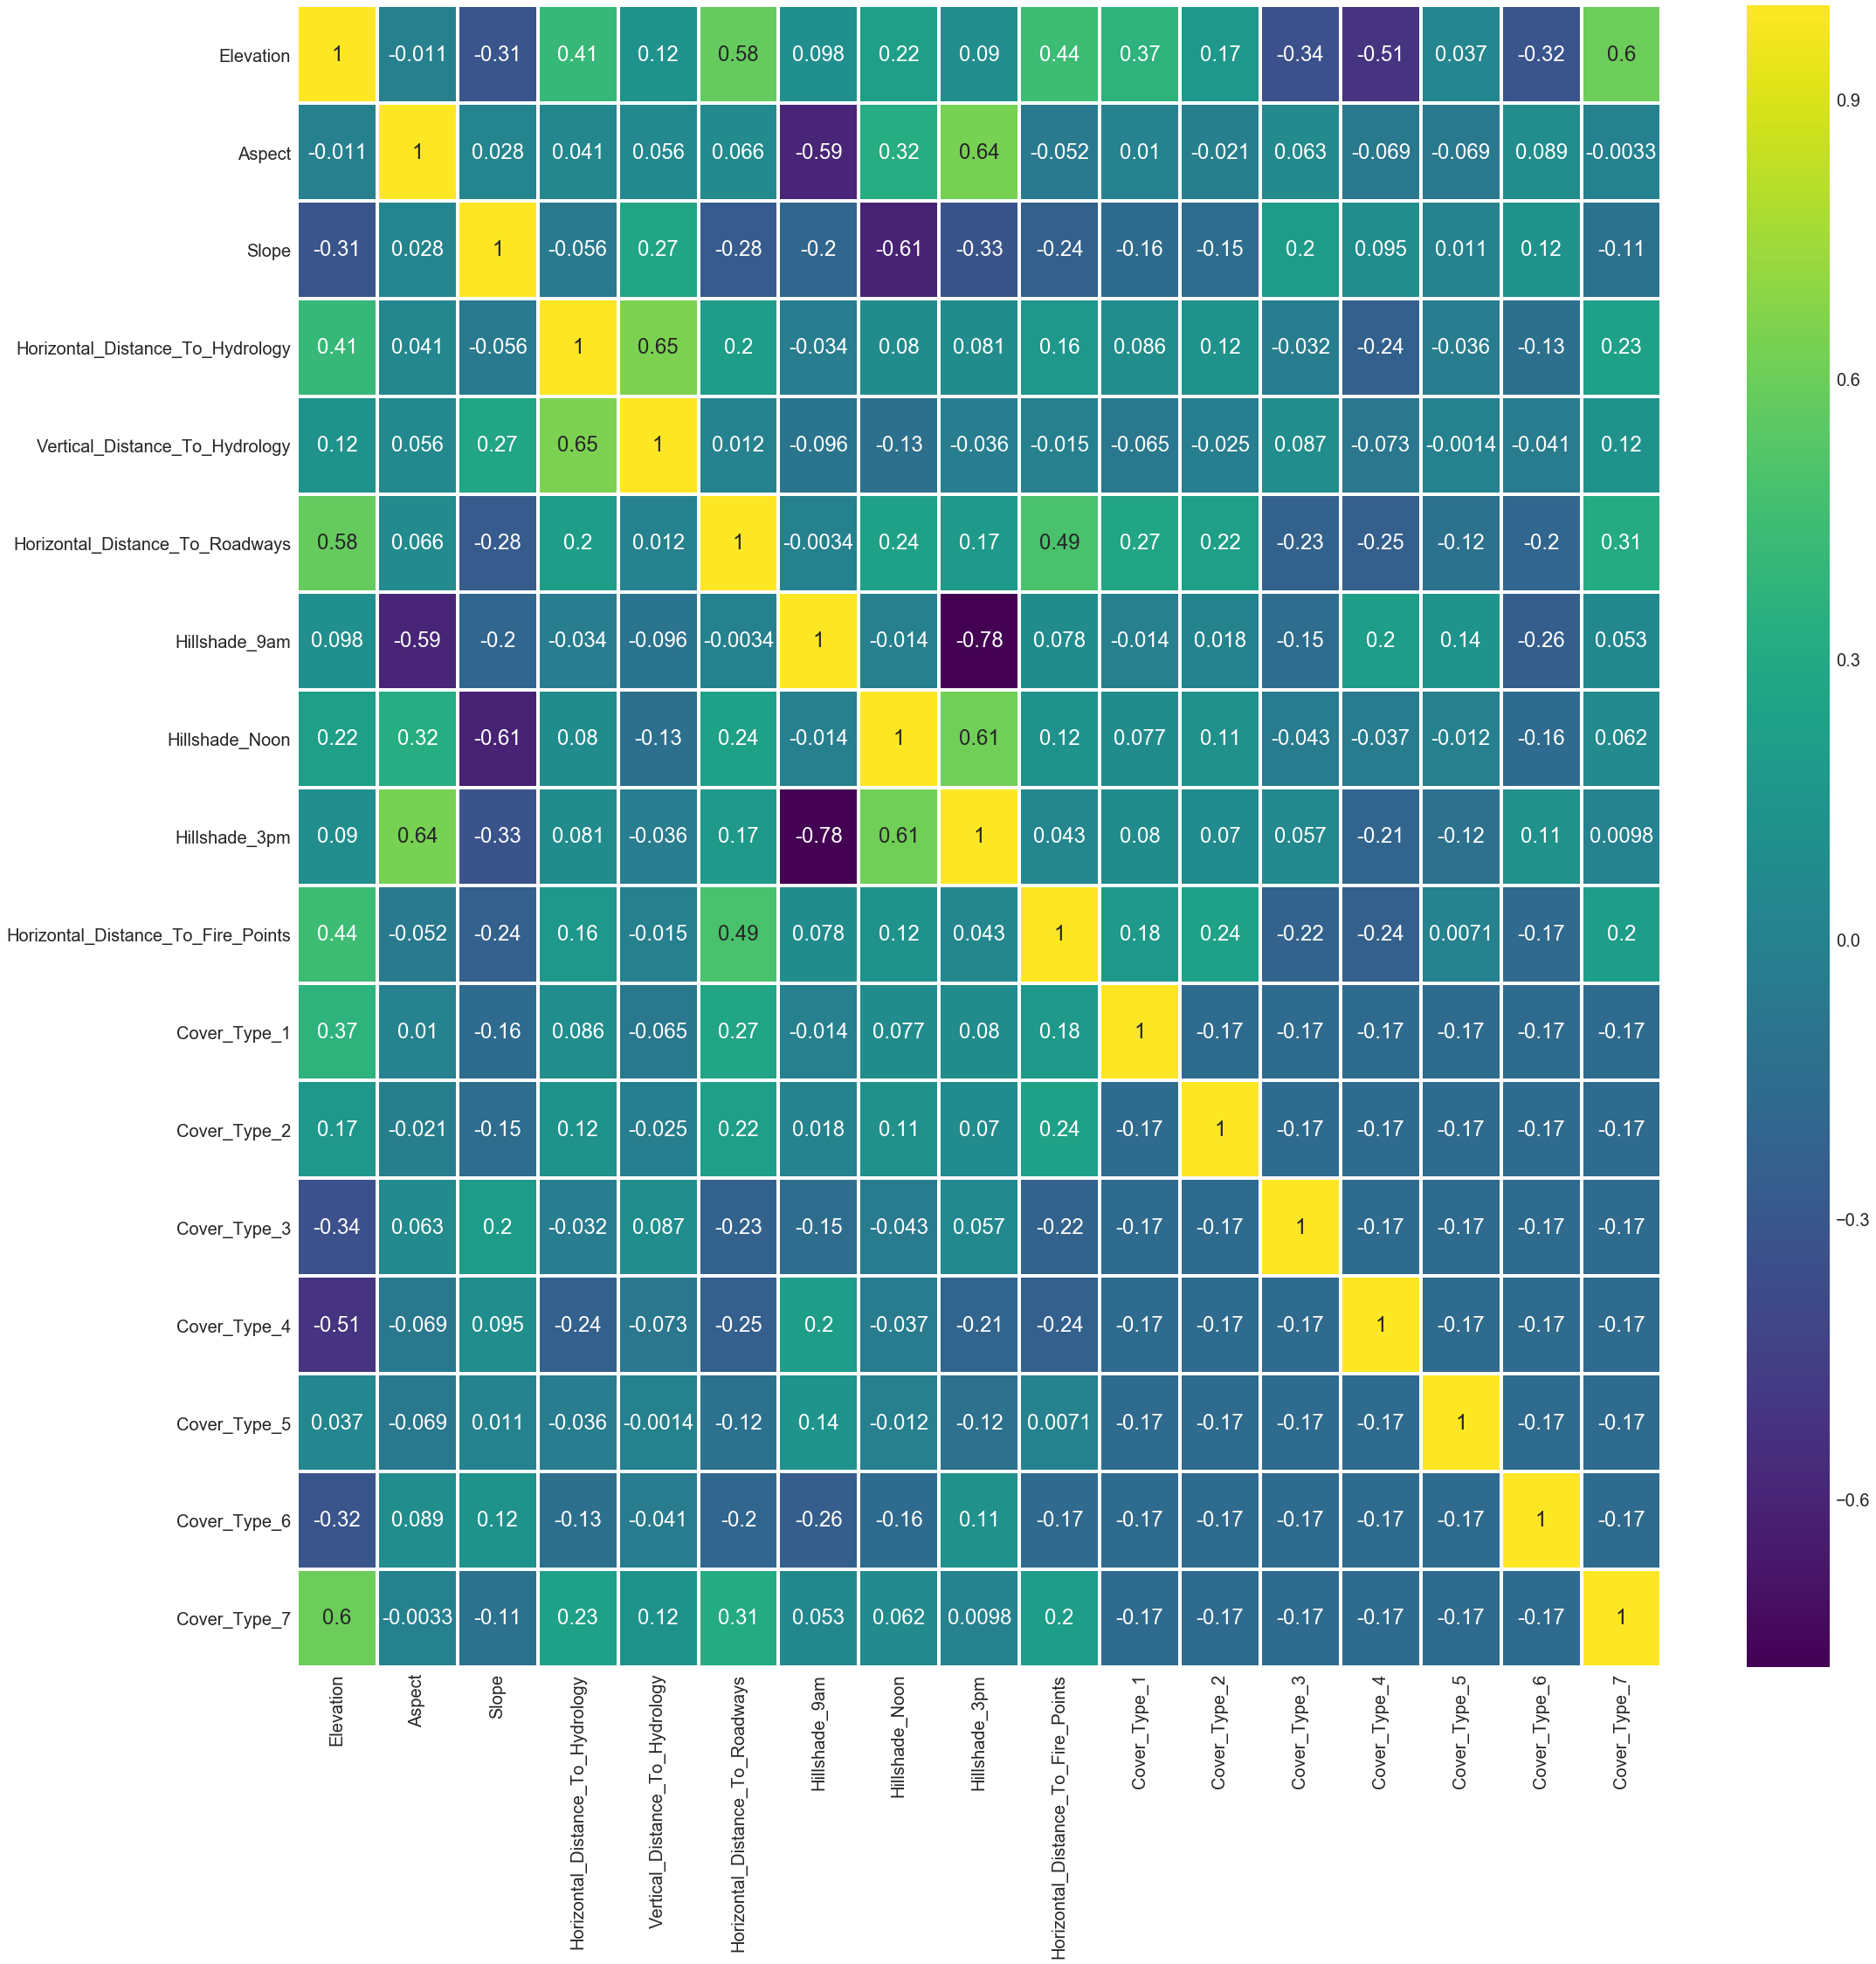

In [9]:
# How about using this features directly? (Not using the scaling and normalization)
fig = plt.figure()
fig.set_size_inches(35, 35)
sns.set(font_scale=2)

# Delete 'Id' and change cover type to dummy variables
cont_var_train_set = train_set.drop('Id', axis=1).drop(cate_vars, axis=1)

# Categorical feature : cannot using correlation directly.
cont_var_train_set_dum = pd.get_dummies(cont_var_train_set, columns=['Cover_Type'])

correlation = cont_var_train_set_dum.corr()
sns.heatmap(correlation, cmap='viridis', annot=True, linewidths=3)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# After feature scailing : Actually, it is same to above correlation
scaled_feat = cont_var_train_set_dum.iloc[:, :-7]
dummy_labels = cont_var_train_set_dum.iloc[:, -7:]

In [13]:
# using scaler
scaler = StandardScaler()
scaler.fit(scaled_feat)
scaled_feat = scaler.transform(scaled_feat)

scaled_feat = pd.DataFrame(scaled_feat, columns=cont_vars)
# scaled_feat.head()

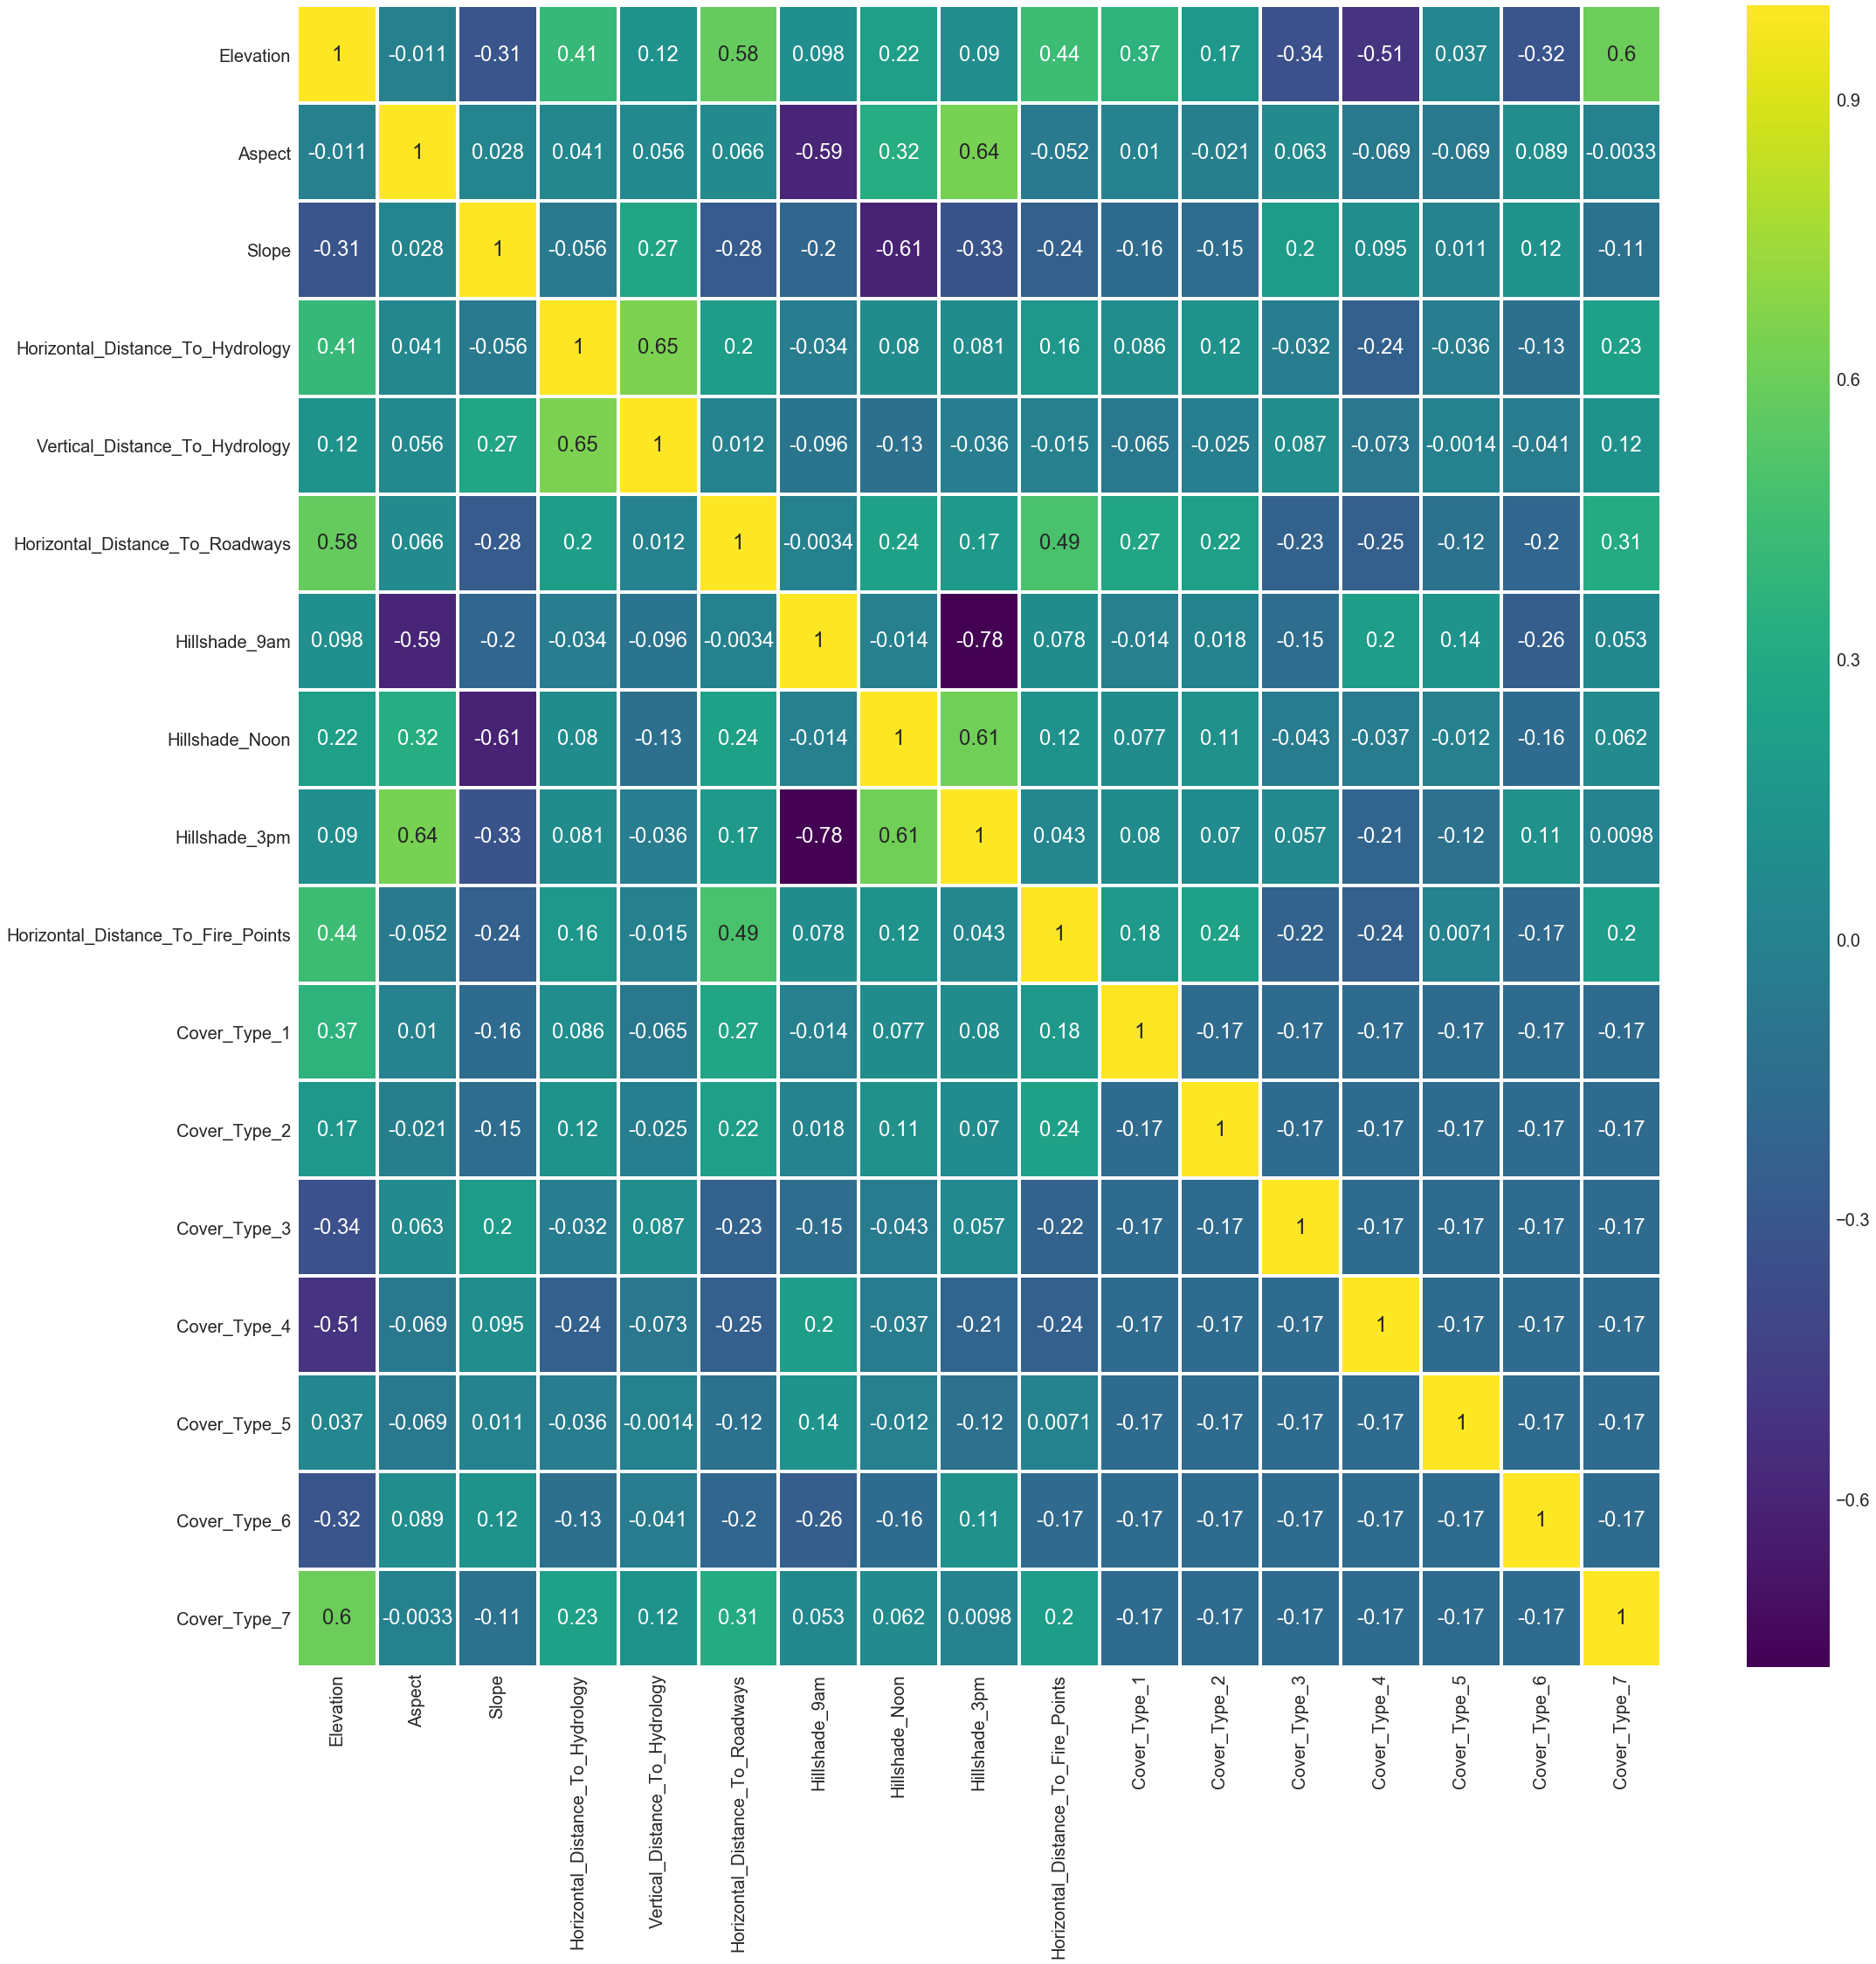

In [14]:
fig = plt.figure()
fig.set_size_inches(35, 35)

correlation2 = pd.concat([scaled_feat, dummy_labels], axis=1).corr()
sns.heatmap(correlation2, cmap='viridis', annot=True, linewidths=3)

## 3-2. Feature Importance

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Spliting the datasets
features = pd.concat([scaled_feat, train_set[cate_vars]], axis=1)
features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,0,0,0,0,0,0,1,0,0,0
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0,0,0,0,0,0,1,0,0,0
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0,0,0,0,0,0,1,0,0,0
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0,0,0,0,0,0,1,0,0,0
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0,0,0,0,0,0,1,0,0,0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, train_set['Cover_Type'], random_state=20190425, test_size=0.3)

In [18]:
rf_model = RandomForestClassifier(max_depth=7, n_estimators=300)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
# Predicting naively
pred = rf_model.predict(x_test)

display(accuracy_score(y_test, pred))
# display(classification_report(y_test, pred))

0.7361111111111112

Text(0.5,0,'Relative Importance')

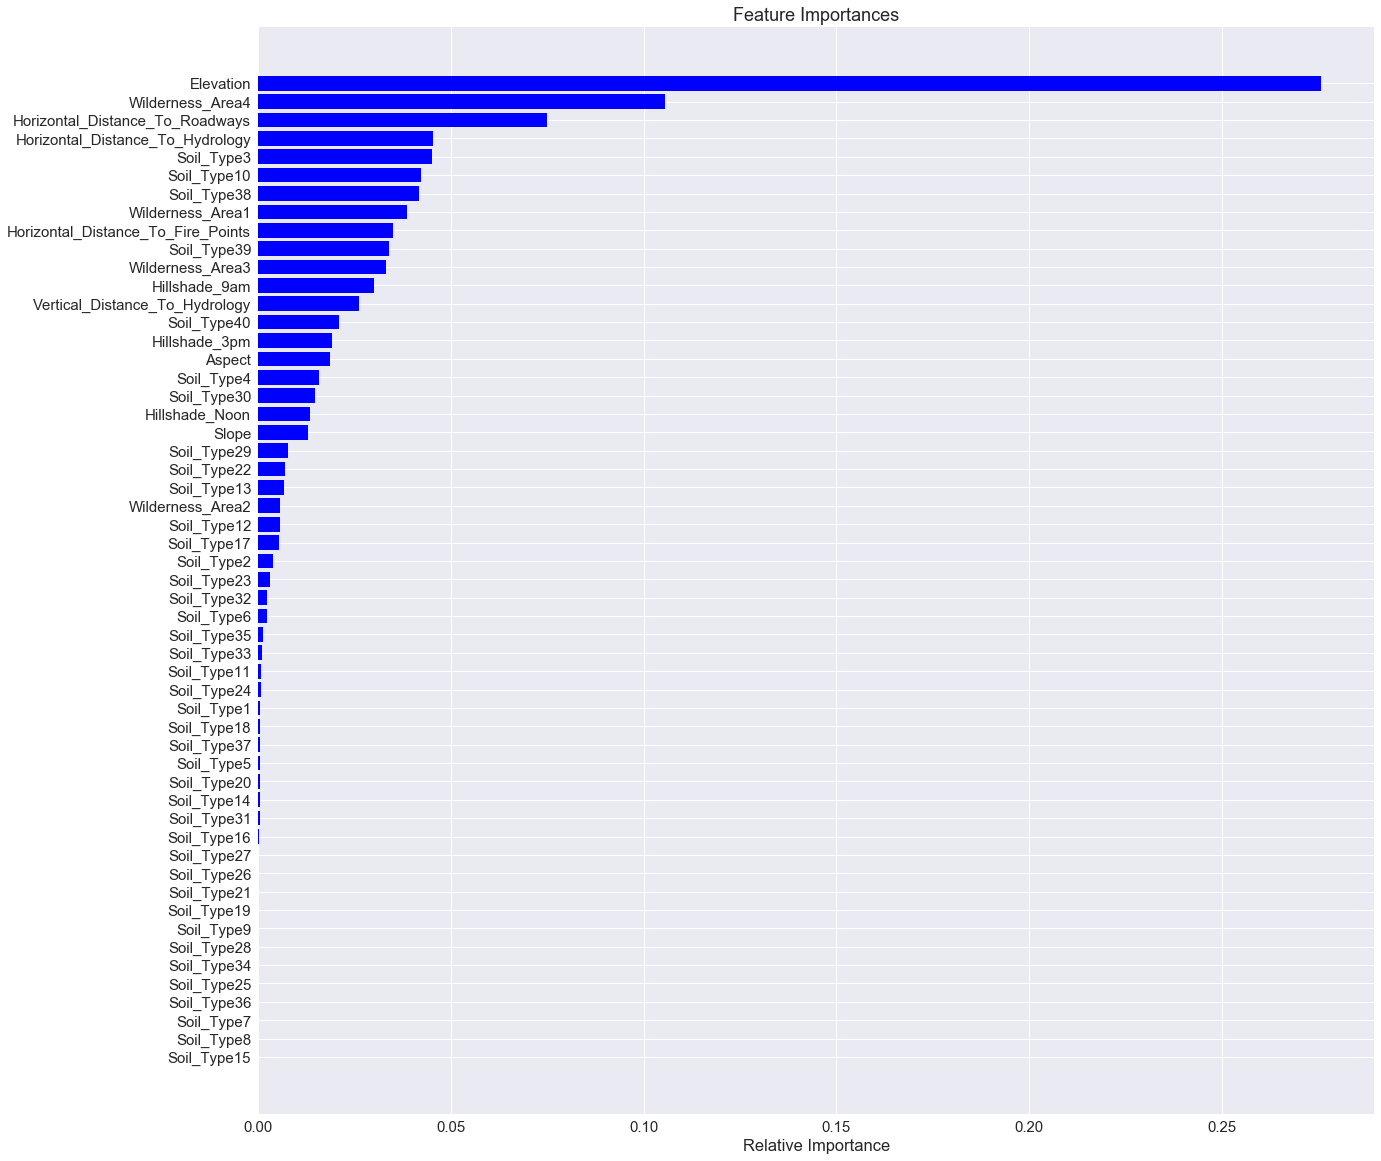

In [21]:
# See the importance of features
importances = rf_model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure()
fig.set_size_inches(20, 20)
sns.set(font_scale=1.5)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features.keys()[indices])
plt.xlabel('Relative Importance')

## 3-3. Checking prediction power of each single feature

## 3-4. Dimension Reduction
> ** Using total features**

In [22]:
# dimensional reduction
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=None, random_state=20180425)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None,
  random_state=20180425, svd_solver='auto', tol=0.0, whiten=False)

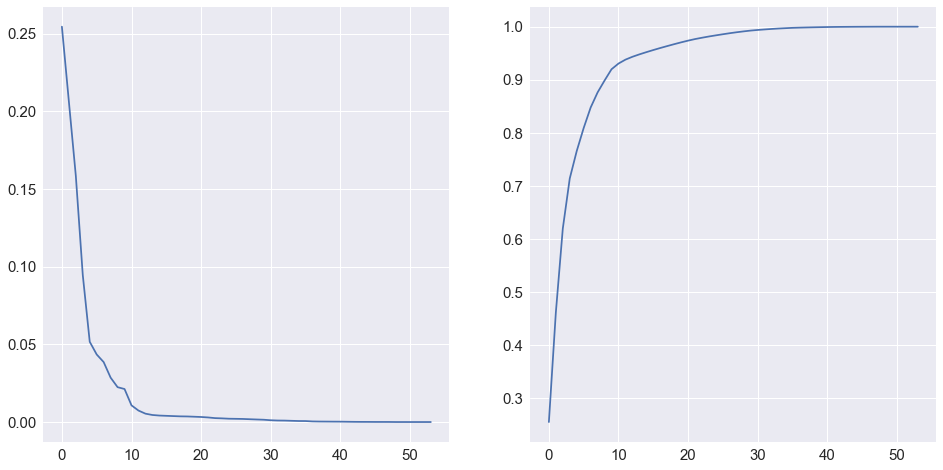

In [23]:
pca_var = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax1, ax2 = ax.flatten()

ax1.plot(pca_var)
ax2.plot(np.cumsum(pca_var))

> **Using selected features**

In [25]:
# train_set.head()

In [26]:
for idx, row in train_set.iterrows():
    for i in range(1, 5):
        if row['Wilderness_Area' + str(i)] == 1:
            train_set.loc[idx, 'Wilderness_Area'] = i
    for i in range(1, 41):
        if row['Soil_Type' + str(i)] == 1:
            train_set.loc[idx, 'Soil_Type'] = i

In [27]:
# train_set.head()

In [28]:
wilderness_area_col = train_set['Wilderness_Area'].astype(int)
soil_type_col = train_set['Soil_Type'].astype(int)

display(wilderness_area_col.head())
display(soil_type_col.head())

0    1
1    1
2    1
3    1
4    1
Name: Wilderness_Area, dtype: int64

0    29
1    29
2    12
3    30
4    29
Name: Soil_Type, dtype: int64

In [29]:
# train_set = train_set.drop(['Soil_Type'+str(idx) for idx in range(1, 41)], axis=1)
# train_set = train_set.drop(['Wilderness_Area'+str(idx) for idx in range(1, 5)], axis=1)

### 3-5. Association of categorical variables
 - Soil_Type : 1 ~ 40
 - Wilderness_Area : 1 ~ 5
 - Cover_Type : 1 ~ 7

In [30]:
import scipy.stats as ss

#### (1) Cramers V statistic

> **Soil_Type**

In [31]:
# get confusion matrix manually
confusions = []
for soil in range(1, 41):
    for cover in range(1, 8):
        cond = train_set[(train_set['Soil_Type'] == soil) & (train_set['Cover_Type'] == cover)]
        confusions.append(cond.count()['Soil_Type'])
confusion_matrix = np.array(confusions).reshape(40, 7)

In [32]:
confusion_matrix = confusion_matrix[confusion_matrix.sum(axis=1) > 0]

In [33]:
# cramers v stat 1
def get_cramers_stat(confusion_matrix):
    confusion_matrix = confusion_matrix
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    cramers_stat = np.sqrt(phi2 / (min(confusion_matrix.shape)-1))
    return cramers_stat

soil_type_result_1 = get_cramers_stat(confusion_matrix)
print(soil_type_result_1)

0.599755912884415


In [34]:
confusion_matrix = pd.crosstab(train_set['Soil_Type'], train_set['Cover_Type'])
confusion_matrix = np.array(confusion_matrix)
soil_type_result_2 = get_cramers_stat(confusion_matrix)
print(soil_type_result_2)

0.599755912884415


> **Wilderness Type**

In [35]:
confusion = []
for wilderness in range(1, 5):
    for cover in range(1, 8):
        cond = train_set[(train_set['Wilderness_Area'] == wilderness) & (train_set['Cover_Type'] == cover)]
        confusion.append(cond.count()['Wilderness_Area'])
confusion_matrix = np.array(confusion).reshape(4, 7)

In [36]:
wilderness_area_result_1 = get_cramers_stat(confusion_matrix) 
print(wilderness_area_result_1)

0.5210098617055663


In [37]:
confusion_matrix = pd.crosstab(train_set['Wilderness_Area'], train_set['Cover_Type'])
confusion_matrix = np.array(confusion_matrix)
wilderness_area_result_2 = get_cramers_stat(confusion_matrix)
print(wilderness_area_result_2)

0.5210098617055663


## 3-6. Embeded Columns

In [38]:
cate_vars_1 = ['Wilderness_Area', 'Soil_Type']

In [40]:
input_features = pd.concat([scaled_feat, wilderness_area_col, soil_type_col], axis=1)
labels = train_set['Cover_Type']

# display(input_features.head())
# display(labels.head())

In [41]:
x_train, x_test, y_train, y_test = train_test_split(input_features, labels, random_state=20190501, test_size=0.3)

In [42]:
import tensorflow as tf

#### (1) Embed the categorical column

In [43]:
wilderness_area_cate_list = list(set(input_features['Wilderness_Area']))
soil_type_cate_list = list(set(input_features['Soil_Type']))

wilderness_area_cols = tf.feature_column.categorical_column_with_vocabulary_list(
    'Wilderness_Area', wilderness_area_cate_list
)

soil_type_cols = tf.feature_column.categorical_column_with_vocabulary_list(
    'Soil_Type', soil_type_cate_list
)

embed_wilderness_area_cols = tf.feature_column.embedding_column(
    categorical_column=wilderness_area_cols,
    dimension = 5
#     dimension = round(len(wilderness_area_cate_list) ** 0.25)
)

embed_soil_type_cols = tf.feature_column.embedding_column(
    categorical_column=soil_type_cols,
    dimension = 5
#     dimension = round(len(soil_type_cate_list) ** 0.25)
)

# 4. Modeling

## (1) Random Forest

In [44]:
test_set_rf = test_set.copy()

In [45]:
test_set_rf_cont = test_set_rf[cont_vars]

scaler.fit(test_set_rf_cont)
test_set_rf_cont = scaler.transform(test_set_rf_cont)
test_set_rf_cont = pd.DataFrame(test_set_rf_cont, columns=cont_vars)
test_set_rf_cate = test_set_rf[cate_vars]

scaled_test_set_rf = pd.concat([test_set_rf_cont, test_set_rf_cate], axis=1)
scaled_test_set_rf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,-1.043274,1.771765,-0.005320,-1.273208,-0.795308,0.202921,-0.605045,-0.479714,0.349015,3.504738,...,0,0,0,0,0,0,1,0,0,0
1,-1.032291,-1.390021,-0.139546,-1.273208,-0.795308,0.183708,-0.417506,-0.378026,0.243835,3.527338,...,0,0,0,0,0,0,1,0,0,0
2,-0.922464,-1.247115,0.128906,-1.273208,-0.795308,0.392484,-0.229966,-0.784777,-0.150590,3.277978,...,0,0,0,0,0,0,1,0,0,0
3,-0.937108,-1.175663,0.397357,-1.273208,-0.795308,0.373272,-0.154950,-1.140685,-0.466130,3.300578,...,0,0,0,0,0,0,1,0,0,0
4,-0.948091,-1.131005,0.665808,-1.273208,-0.795308,0.354059,-0.079934,-1.445748,-0.729080,3.323179,...,0,0,0,0,0,0,1,0,0,0


In [46]:
rf_pred = rf_model.predict(scaled_test_set_rf)
rf_result = pd.concat([test_set['Id'], pd.DataFrame({'Cover_Type': rf_pred})], axis=1)
rf_result.to_csv("rf_submission.csv", index=False)

## (2) DNN

In [47]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    x = x_train,
    y = y_train,
    num_epochs = 30,
    batch_size = 50,
    shuffle=True
)

eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x = x_test,
    y = y_test,
    num_epochs = 1,
    shuffle = False
)

In [49]:
tf_features = []

# used standard scaler in sklearn
[tf_features.append(tf.feature_column.numeric_column(col)) 
 for col in cont_vars]

tf_features.extend([embed_wilderness_area_cols, embed_soil_type_cols])
# tf_features

In [50]:
estimator = tf.estimator.DNNClassifier(
    feature_columns = tf_features,
    hidden_units = [1024, 512, 256],
    n_classes = 8,
    optimizer = tf.train.AdamOptimizer()
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/x6/pxwr89_95yxbhw5nh8b7jk1w0000gn/T/tmpqmkot4kw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10a969438>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
estimator.train(input_fn=train_input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/x6/pxwr89_95yxbhw5nh8b7jk1w0000gn/T/tmpqmkot4kw/model.ckpt.
INFO:tensorflow:loss = 106.37029, step = 1
INFO:tensorflow:global_step/sec: 138.791
INFO:tensorflow:loss = 36.00204, step = 101 (0.721 sec)
INFO:tensorflow:global_step/sec: 158.242
INFO:tensorflow:loss = 34.8989, step = 201 (0.632 sec)
INFO:tensorflow:global_step/sec: 147.897
INFO:tensorflow:loss = 37.379925, step = 301 (0.676 sec)
INFO:tensorflow:global_step/sec: 152.998
INFO:tensorflow:loss = 25.812366, step = 401 (0.654 sec)
INFO:tensorflow:global_step/sec: 145.965
INFO:tensorflow:loss = 34.15311, step = 501 (0.685 sec)
INFO:tensorflow:global_step/sec: 156.977
INFO:tensorflow:loss = 20.731209, step = 601 (0.637 sec)
INFO:tensorflow:global_step/sec: 154.291
INFO:tensorflow:loss = 17.548063, step = 701 (0.648 sec)
INFO:tensorflow:global_step/sec: 146.31
INFO:tensorflow:loss = 30.84761, step = 801 (0.684 sec)
INFO:tensorflow:

In [52]:
estimator.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Starting evaluation at 2018-05-20-16:28:02
INFO:tensorflow:Restoring parameters from /var/folders/x6/pxwr89_95yxbhw5nh8b7jk1w0000gn/T/tmpqmkot4kw/model.ckpt-6351
INFO:tensorflow:Finished evaluation at 2018-05-20-16:28:02
INFO:tensorflow:Saving dict for global step 6351: accuracy = 0.84832454, average_loss = 0.5821223, global_step = 6351, loss = 73.34741


{'accuracy': 0.84832454,
 'average_loss': 0.5821223,
 'global_step': 6351,
 'loss': 73.34741}

In [ ]:
# # Test set setting
# test_set_copy = test_set.copy()

# # categorical data transfer
# for idx, row in test_set_copy.iterrows():
#     for i in range(1, 5):
#         if row['Wilderness_Area' + str(i)] == 1:
#             test_set_copy.loc[idx, 'Wilderness_Area'] = i
#     for i in range(1, 41):
#         if row['Soil_Type' + str(i)] == 1:
#             test_set_copy.loc[idx, 'Soil_Type'] = i

In [ ]:
# # 1. scaling the continous features
# test_cont_feat = test_set_copy[cont_vars]
# scaler.fit(test_cont_feat)
# test_scaled_cont_feat = scaler.transform(test_cont_feat)
# test_scaled_cont_feat = pd.DataFrame(test_scaled_cont_feat, columns=cont_vars)

# # 2. categorical features
# test_cate_feat = test_set_copy[cate_vars_1].astype(int)

# # 3. concat
# test_input_features = pd.concat([test_scaled_cont_feat, test_cate_feat], axis=1)

In [ ]:
# display(test_cont_feat.head())
# display(test_scaled_cont_feat.head())
# display(test_input_features.head())

In [ ]:
# # 3. prediction input function
# pred_input_fn = tf.estimator.inputs.pandas_input_fn(
#     x = test_input_features,
#     num_epochs = 1,
#     shuffle = False
# )

# predictions = list(estimator.predict(pred_input_fn))
# predicted_classes = [int(pred['classes']) for pred in predictions]

In [ ]:
# result = predicted_classes[:]

In [ ]:
# result = pd.concat([test_set['Id'], pd.DataFrame({'Cover_Type': result})], axis=1)

In [ ]:
# result.head()

In [ ]:
# result.to_csv("submission.csv", index=False)